# Análise Exploratória de Dados

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
# Configurar o estilo do Seaborn
sns.set_style("whitegrid")  # Fundo com grade suave
sns.set_palette("tab10")   # Cores suaves e modernas

In [2]:
df_eda = pd.read_csv('../data/processed/pronto.csv')

In [3]:
# 5 últimas linhas
df_eda.tail()

,ano,territorio,num_empresas,populacao,razao_pop_empresa
65,2020,Norte,3316,8596692,2592.488540
66,2020,Nordeste,16288,29718750,1824.579445
67,2020,Sudeste,64975,50370550,775.229704
68,2020,Sul,36698,17177286,468.071448
69,2020,Centro-Oeste,10713,9116328,850.959395


In [4]:
# Estatísticas descritivas
print(df_eda.describe())

               ano  num_empresas     populacao  razao_pop_empresa
count    70.000000     70.000000  7.000000e+01          70.000000
mean   2013.500000  20833.971429  2.040710e+07        1328.389995
std       4.060235  18680.925349  1.461685e+07         663.933100
min    2007.000000   2209.000000  5.591294e+06         464.052700
25%    2010.000000   6570.250000  7.791496e+06         773.227731
50%    2013.500000  14671.500000  1.579880e+07        1160.784469
75%    2017.000000  32058.250000  2.757624e+07        1799.972801
max    2020.000000  64975.000000  5.037055e+07        2823.128595


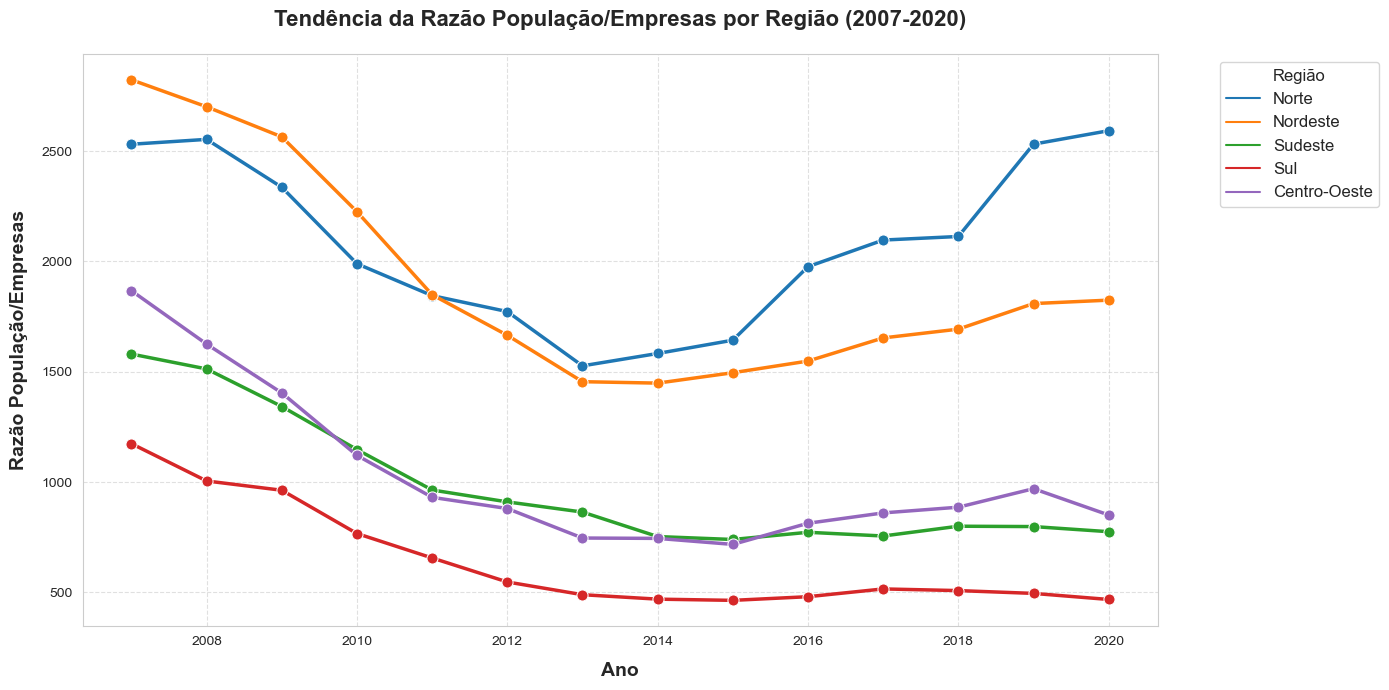

In [5]:
# Ajustar tamanho do gráfico
plt.figure(figsize=(14, 7))

# Criar gráfico de linhas para cada região
sns.lineplot(data=df_eda, x="ano", y="razao_pop_empresa", hue="territorio", marker="o", markersize=8, linewidth=2.5)

# Ajustar o título e rótulos
plt.title("Tendência da Razão População/Empresas por Região (2007-2020)", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Ano", fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel("Razão População/Empresas", fontsize=14, fontweight="bold", labelpad=10)

# Melhorar a legenda
plt.legend(title="Região", title_fontsize=12, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar grade sutil
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustar layout para evitar cortes
plt.tight_layout()

# Exibir o gráfico
plt.show()

- Regiões norte e nordeste apresentaram padrões similiares, principalmente entre os anos de 2007 até 2015, onde apartir de 2016 a razão aumentou muito na região norte.

- Regiões sudeste e centro-oeste apresentaram padrões praticamente iguais, principalmente entre os anos de 2007 até 2015, onde apartir de 2016 a razão aumentou muito na região norte. 

- Região sul apresentou um mercado bastante saturado.

- Destaque para a grande diferença entre regiôes norte e sul.

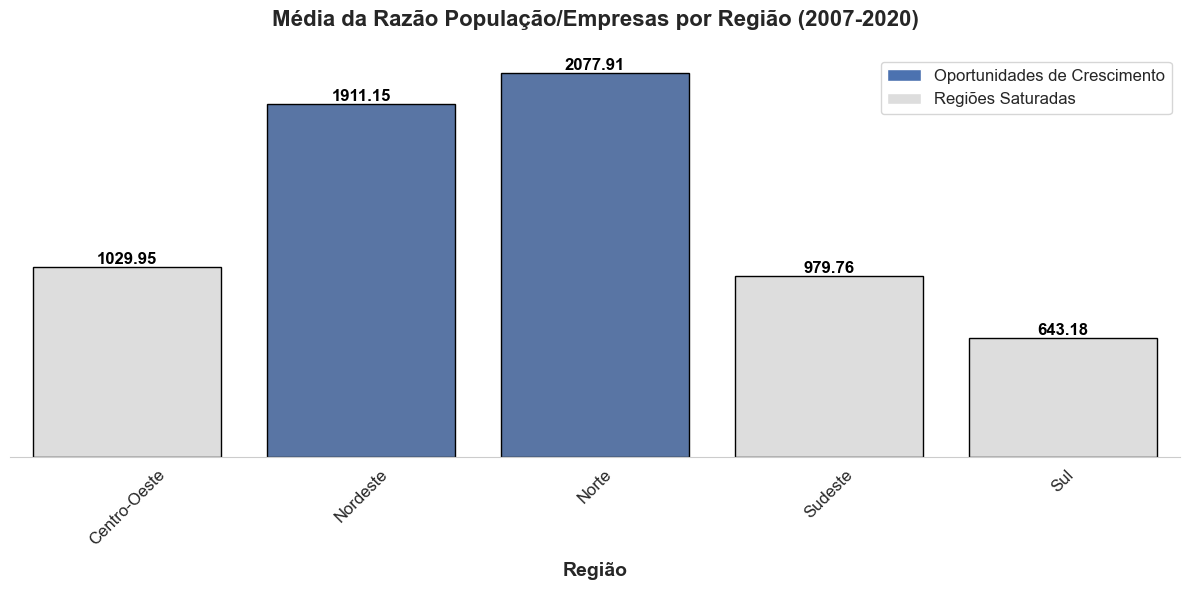

In [6]:
# Calcular a média da razão por região
df_media = df_eda.groupby("territorio")["razao_pop_empresa"].mean().reset_index()

# Definir cores para as regiões
cores = []
for regiao in df_media["territorio"]:
    if regiao in ["Norte", "Nordeste"]:
        cores.append("#4C72B0")  # Azul para oportunidades de crescimento
    else:
        cores.append("#DDDDDD")  # Cinza claro para regiões saturadas

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_media, x="territorio", y="razao_pop_empresa", palette=cores, edgecolor="black", linewidth=1)

# Remover o eixo y
plt.gca().get_yaxis().set_visible(False)

# Adicionar os valores arredondados acima das colunas
for i, valor in enumerate(df_media["razao_pop_empresa"]):
    valor_arredondado = round(valor, 2)  # Arredondar para 2 casas decimais
    ax.text(i, valor + 0.1, f"{valor_arredondado}", ha='center', va='bottom', fontsize=12, color="black", fontweight="bold")

# Ajustar o título e rótulos
plt.title("Média da Razão População/Empresas por Região (2007-2020)", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Região", fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel("")  # Remover o rótulo do eixo y
plt.xticks(rotation=45, fontsize=12)

# Adicionar uma legenda
legend_elements = [
    Patch(facecolor='#4C72B0', label='Oportunidades de Crescimento'),
    Patch(facecolor='#DDDDDD', label='Regiões Saturadas')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=12)

# Remover bordas desnecessárias
sns.despine(left=True)

# Ajustar layout para evitar cortes
plt.tight_layout()

# Exibir o gráfico
plt.show()

- Regiões com razão muito alta = Possíveis oportunidades de crescimento.
   - Ex: Razão = 2078 → Para cada empresa, existem 2078 consumidores potenciais. Isso pode indicar oportunidade de crescimento se a demanda não estiver sendo atendida. 
   
- Regiões com razão mais baixa = Mais saturadas (muitas pessoas para poucas empresas).
    - Ex: Razão = 643 → Para cada empresa, existem 643 consumidores.  Isso pode indicar alta concorrência, dificultando a entrada de novos negócios.

In [7]:
import scipy.stats as stats

correlacao, p_valor = stats.pearsonr(df_eda["populacao"], df_eda["num_empresas"])
print(f"Correlação entre população e número de empresas: {correlacao:.2f}")


Correlação entre população e número de empresas: 0.85


- Correlação bem próxima de 1, significa que o número de empresas cresce proporcionalmente à população.